## Importation des librairies

In [1]:
import pandas as pd
import tkinter as tk
from tkinter import *
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import math
import os
#import rpack
import random
import numpy as np
import sys
from PIL import Image
#from PIL import EpsImagePlugin
#EpsImagePlugin.gs_windows_binary =  r'C:\...\gs\gs9.52\bin\gswin64c'
from PIL import ImageGrab
import time
from scipy import spatial
from scipy.spatial.distance import pdist, squareform
from io import BytesIO
import matplotlib.pyplot as plt
from math import pi

random.seed(42)

np.set_printoptions(threshold=sys.maxsize)

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
class App(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title('Window')
        self.h = 1000
        self.w = 2000
        self.geometry(str(self.w)+'x'+str(self.h))
   
    def getH(self):
        return self.h
    
    def getW(self):
        return self.w
    
    def quit(self):
        self.destroy()

In [4]:
class Piece():
    def __init__(self):
        self.x = 0
        self.y = 0
        self.h = 0
        self.w = 0
        self.pct = 0
        self.it = 0
        self.oldwh = []
        
        self.tlc = []
        self.trc = []
        self.blc = []
        self.brc = []
        
        self.center = []
        
    def setX(self,x):
        self.x = x
        
    def setY(self,y):
        self.y = y
        
    def setW(self,w):
        self.w = w
        
    def setH(self,h):
        self.h = h
    
    def setPct(self, pct):
        self.pct = pct        
    
    def setTlc(self, tlc):
        self.tlc = tlc
    
    def getTlc(self):
        self.tlc = [self.x, self.y]
        return self.tlc
    
    def getTrc(self):
        self.trc = [self.x+self.w, self.y]
        return self.trc
    
    def getBlc(self):
        self.blc = [self.x, self.y+self.h]
        return self.blc
    
    def getBrc(self):
        self.brc = [self.x+self.w, self.y+self.h]
        return self.brc
    
    def getCenter(self):
        tlc = self.getTlc()
        self.center = [tlc[0]+(self.w/2), tlc[1]+(self.h/2)]
        return self.center
    
    def appendOldWH(self):
        self.oldwh.append([self.w,self.h])
        
    def getOldWH(self):
        return self.oldwh
    
    def setDims(self, x, y, w, h):
        self.setX(x)
        self.setY(y)
        self.setW(w)
        self.setH(h)
        
    def getSurface(self):
        return self.w*self.h
    
class Chambre(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 15
        self.pctdef = 15
        self.num = 1
        self.col = "orange"
        self.prio = 2
    
    def __str__(self):
        return "Chambre"
        
class Cuisine(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 15
        self.pctdef = 15
        self.num = 2
        self.col = "green"
        self.prio = 3
        
    def __str__(self):
        return "Cuisine"
        
class Sam(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 15
        self.pctdef = 15
        self.num = 3
        self.col = "purple"
        self.prio = 1
        
    def __str__(self):
        return "Salle à manger"
    
class Sdb(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 10
        self.pctdef = 10
        self.num = 4
        self.col = "blue"
        self.prio = 4
    
    def __str__(self):
        return "Salle de bain"
        
class Toilettes(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 5
        self.pctdef = 5
        self.num = 5
        self.col = "grey"
        self.prio = 5
        
    def __str__(self):
        return "Toilettes"
        
class Rangement(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 5
        self.pctdef = 5
        self.num = 6
        self.col = "maroon"
    
    def __str__(self):
        return "Rangement"
    
class Buanderie(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        self.pct = 5
        self.pctdef = 5
        self.num = 7
        self.col = "cyan"
        
    def __str__(self):
        return "Buanderie"

class Entree(Piece):
    def __init__(self):
        Piece.__init__(self)
        self.h = 100
        self.w = 100
        #self.pct = 15
        self.num = 8
        self.col = "yellow"
        self.prio = 1001
    
    def __str__(self):
        return "Entrée"    

def tabModulo(n):
    n = n
    l = []
    
    #print(n)
    
    for i in range (1,n+1):
        if n%i == 0 and i != 1 and i != n:
            l.append(i)
            
    nl = l[::-1]
    tab = pd.DataFrame(l, columns = [1])
    tab[2] = nl
    #display(tab)
    
    return tab

In [5]:
def uniq(lst):
    last = object()
    for item in lst:
        if item == last:
            continue
        yield item
        last = item

def sort_and_deduplicate(l):
    return list(uniq(sorted(l, reverse=True)))

In [22]:
class Appartement():
    def __init__(self, app, h, w):
        self.app = app
        self.x = 150
        self.y = 50
        self.h = h
        self.w = w
        self.listePieces = []
        self.prio = 1000
        
        self.tlc = [self.x, self.y, "TLC"]
        self.trc = [self.x+self.w, self.y, "TRC"]
        self.blc = [self.x, self.y+self.h, "BLC"]
        self.brc = [self.x+self.w, self.y+self.h, "BRC"]
        self.listeCoinsFinale = []
        self.listeCoinsTotale = []
        self.listeCoinsAppart = [[self.tlc],[self.trc],[self.brc],[self.blc]]
        self.listeCoinsRemoved = []
        self.tabCoinsPieceWithoutRemoved = pd.Series()
        self.indic = 1
        self.indic2 = 1
        self.doneList = []
        self.listObjectifs = []
        
        self.ent = Entree()
        
        self.mat = np.zeros((self.w, self.h))
        
        self.can = tk.Canvas(self.app, bg = "white", height = app.getH(), width = app.getW())
        #self.frame1=Frame(self.app,bg = "green",bd=10,width=100,  height=50,cursor = "target").pack(side=TOP)  
        #self.can2 = tk.Canvas(self.frame1, bg = "white", height = app.getH(), width = app.getW())
        
    def creerAppartement(self,k):
        self.can.create_rectangle(self.x+k, self.y, 
                             self.x+k+self.w, self.y+self.h)
        
        self.can.create_line((self.x+k+(self.w)/2)-17, self.y,(self.x+k+(self.w)/2)+17, self.y, fill = "white")
        
    def afficherAppartement(self):
        #self.creerAppartement(self.can,0)
        #self.creerAppartement(self.can, 700)
        
        #self.creerAppartement(self.can2, 0)
        #self.creerAppartement(self.can2, 550)
        #self.creerAppartement(self.can2, 1100)
         
            #fill = "white" )
        #can.create_polygon(self.x, self.y,
        #                   (self.x+self.w)-(self.x+self.w)/4, self.y,
        #                   (self.x+self.w)-(self.x+self.w)/4, self.y+(self.x+self.w)/6,
        #                   self.x+self.w, self.y+(self.x+self.w)/6,
        #                   self.x+self.w, self.y + self.h,
        #                   self.x, self.y + self.h, 
        #                   outline = "black",
        #                   fill = "white" )
        
        self.ent.setX(int((self.x+(self.w)/2)-25))
        self.ent.setY(self.y)
        self.ent.setW(50)
        self.ent.setH(self.y)
        tlc = self.ent.getTlc()
        brc = self.ent.getBrc()
        
        #self.can.pack()
        #self.can2.pack()
        
    def afficherGrille(self,k):
        self.dimcase = math.sqrt((5*(self.h*self.w))/100)
        self.nbcasesh = int(self.h/self.dimcase)
        self.nbcasesw = int(self.w/self.dimcase)
        #print(self.dimcase)
        #print(self.nbcasesh)
        #print(self.nbcasesw)
        for i in range(self.nbcasesh):
            for j in range(self.nbcasesw):
                #print(i)
                self.can.create_rectangle(self.x+k+j*self.dimcase, self.y+i*self.dimcase, self.x+k+(j+1)*self.dimcase, self.y+(i+1)*self.dimcase, outline = 'red')
        
        self.can.pack()
    
    def drawRoom(self, tlc, brc, piece, k):
        self.can.create_rectangle(tlc[0]+k,tlc[1],brc[0]+k,brc[1], outline = piece.col, fill = "white")
        self.can.create_text(tlc[0]+k+(piece.w/2),tlc[1]+(piece.h/2),fill="black", text=f"{piece.__str__()}") #font="Times 8",text=f"{piece.__str__()}")
    
    def dimensionRoom(self, piece):
        piece.setPct(piece.pctdef)
        piece.setX(self.x)
        piece.setY(self.y)
        
        totalpct = 100

        if piece.pct == 5:
            rndpct = random.randrange(0,2,2)
        else:
            rndpct = random.randrange(-5,6,5)

        if totalpct > 15:
            piece.setPct(piece.pct+rndpct)

        totalpct = totalpct-(piece.pct+rndpct)
        
        if piece.it > 10:
            piece.setPct(5)
        #print('ITEREDIM', piece.it, piece.pct)
        #print(piece.__str__()+" "+str(piece.pct))
        #print(totalpct)

        dimcase = int((piece.pct*(self.h*self.w))/100)
        tab = tabModulo(dimcase)
        
        if piece.pct == 5:
            lim = 100
        else:
            lim = 120
        
        for i in range(2):
            dimliste = [self.w, self.h]
            indexModuloLow = tab[tab[i+1] < lim].index
            indexModuloHigh = tab[tab[i+1] > dimliste[i]].index
            tab.drop(indexModuloLow, inplace = True)
            tab.drop(indexModuloHigh, inplace = True)
        
        #display(tab)
        
        tabOldWH = piece.getOldWH()
        
        rnddim = random.choice(tab.values.tolist())
        
        while rnddim in tabOldWH:
            #print(rnddim, tabOldWH)
            rnddim = random.choice(tab.values.tolist())
        
        rnddim[0] = math.sqrt(dimcase)
        rnddim[1] = rnddim[0]
            
        piece.setW(rnddim[0])
        piece.setH(rnddim[1])
            
        
        #return piece
    
    def createRooms(self):      
        chb = Chambre()
        csn = Cuisine()
        sdb = Sdb()
        sam = Sam()
        tlt = Toilettes()
        rng = Rangement()
        bdr = Buanderie()
        
        #self.listePieces = [chb,csn,sdb,sam,tlt,rng,bdr]
        self.listePieces = [chb,csn,sdb,sam,tlt]
        random.shuffle(self.listePieces)
        
        idx = 0
        sumW = 0
        for piece in self.listePieces:
            self.dimensionRoom(piece)
            sumW = sumW+piece.w
            tlc = [piece.x+(sumW-piece.w),piece.y+self.h+piece.y]
            brc = [piece.x+sumW, piece.y+self.h+piece.y+piece.h]
            
            #self.drawRoom(self.can, tlc, brc, piece,0)
            
            idx += 1
        
        self.can.pack()
    
    def verifyRooms(self, piece, listeCoins, multipleToRemove, placed):
        ptrc, ptlc, pbrc, pblc = piece.getTrc(),piece.getTlc(),piece.getBrc(),piece.getBlc()
        listeCoinsPiece = [ptrc, ptlc, pbrc, pblc]
        horsChamps = 0
        superposition = 0
        superpositionplaced = 0
        remover = 0

        for coinpiece in listeCoinsPiece:
            for coinliste in listeCoins:
                if coinpiece[0] == coinliste[0] and coinpiece[1] == coinliste[1]:
                    #print(f"Removed corner : {coinliste}")
                    listeCoins.remove(coinliste)
                    remover += 1
                    multipleToRemove.append(coinliste)
            if coinpiece[0] < self.x or coinpiece[0] > self.x+self.w or coinpiece[1] < self.y or coinpiece[1] > self.y+self.h:
                horsChamps = 1

        #print(placed)
        for placedpiece in placed:
            if piece.__str__() != placedpiece.__str__():
                pptrc, pptlc, ppbrc, ppblc = placedpiece.getTrc(),placedpiece.getTlc(),placedpiece.getBrc(),placedpiece.getBlc()
                listeppcoins = [pptrc, pptlc, ppbrc, ppblc]
                center = piece.getCenter()
                if (center[0] >= pptlc[0] and center[0] <= ppbrc[0] and center[1] >= pptlc[1] and center[1] <= ppbrc[1]):
                    superposition = 1
                    #print(piece.__str__(), placedpiece.__str__(), 'center')
                    break
                if (center[0]+(piece.w/2)-1 >= pptlc[0] and center[0]+(piece.w/2)-1 <= ppbrc[0] and center[1] >= pptlc[1] and center[1] <= ppbrc[1]) or (center[0]-(piece.w/2)+1 >= pptlc[0] and center[0]-(piece.w/2)+1 <= ppbrc[0] and center[1] >= pptlc[1] and center[1] <= ppbrc[1]):
                    superposition = 1
                    #print(piece.__str__(), placedpiece.__str__(), 'close edge lr')
                    self.can.create_text(center[0]+(piece.w/2)-1, center[0]-(piece.w/2)+1, text = "LR", fill = 'red')
                    break
                if (center[0] >= pptlc[0] and center[0] <= ppbrc[0] and center[1]+(piece.h/2)-1 >= pptlc[1] and center[1]+(piece.h/2)-1 <= ppbrc[1]) or (center[0] >= pptlc[0] and center[0] <= ppbrc[0] and center[1]-(piece.h/2)+1 >= pptlc[1] and center[1]-(piece.h/2)+1 <= ppbrc[1]):
                    superposition = 1
                    #print(piece.__str__(), placedpiece.__str__(), 'close edge tb')
                    self.can.create_text(center[1]+(piece.h/2)-1, center[1]-(piece.h/2)+1, text = "TB", fill = 'red')
                    break
                '''
                if (ptlc[0]+1 > pptlc[0] and pbrc[0]-1 < ppbrc[0] and ptlc[1]+1 > pptlc[1] and pbrc[1]-1 < ppbrc[1]):
                    superposition = 1
                    self.drawRoom([ptlc[0]+1,ptlc[1]+1],[pbrc[0]-1,pbrc[1]-1], piece, 0)
                    break

                for coinpiece in listeCoinsPiece:
                    if (coinpiece[0] > pptlc[0] and coinpiece[0] < ppbrc[0] and coinpiece[1] > pptlc[1] and coinpiece[1] < ppbrc[1]):
                        superposition = 1

            
                
                
                centerplaced = placedpiece.getCenter()
                centerTLC = centerplaced[0]+(piece.w/2)-1
                if (centerplaced[0]+(piece.w/2)-1 >= ptlc[0] and centerplaced[0]+(piece.w/2)-1 <= pbrc[0] and centerplaced[1] >= ptlc[1] and centerplaced[1] <= pbrc[1]) or (centerplaced[0]-(piece.w/2)+1 >= ptlc[0] and centerplaced[0]-(piece.w/2)+1 <= pbrc[0] and centerplaced[1] >= ptlc[1] and centerplaced[1] <= pbrc[1]):
                    superposition = 1
                    print(piece.__str__(), placedpiece.__str__(), 'close edge lr')
                    break
                if (centerplaced[0] >= pptlc[0] and centerplaced[0] <= pbrc[0] and centerplaced[1]+(piece.h/2)-1 >= ptlc[1] and centerplaced[1]+(piece.h/2)-1 <= pbrc[1]) or (centerplaced[0] >= ptlc[0] and centerplaced[0] <= ppbrc[0] and centerplaced[1]-(piece.h/2)+1 >= pptlc[1] and centerplaced[1]-(piece.h/2)+1 <= ppbrc[1]):
                    superposition = 1
                    print(piece.__str__(), placedpiece.__str__(), 'close edge tb')
                    break
                
                if (center[0]+(piece.w/2)-1 >= ptlc[0] and center[0]+(piece.w/2)-1 <= pbrc[0] and center[1]+(piece.h/2)-1 >= ptlc[1] and center[1]+(piece.h/2)-1 <= pbrc[1]) or (center[0]-(piece.w/2)+1 >= ptlc[0] and center[0]-(piece.w/2)+1 <= pbrc[0] and center[1]-(piece.h/2)+1 >= ptlc[1] and center[1]-(piece.h/2)+1 <= pbrc[1]):
                    superposition = 1
                    print(piece.__str__(), placedpiece.__str__(), 'close edge lr')
                    break
                
                if (center[0] >= pptlc[0] and center[0] <= pbrc[0] and center[1]+(piece.h/2)-1 >= ptlc[1] and center[1]+(piece.h/2)-1 <= pbrc[1]) or (center[0] >= ptlc[0] and center[0] <= pbrc[0] and center[1]-(piece.h/2)+1 >= ptlc[1] and center[1]-(piece.h/2)+1 <= pbrc[1]):
                    superposition = 1
                    print(piece.__str__(), placedpiece.__str__(), 'close edge tb')
                    break
                    
                if (coinpp[0] > ptlc[0] and coinpp[0] <= pbrc[0] and coinpp[1] >= ptlc[1] and coinpp[1] < pbrc[1]):
                    superpositionplaced = 1
               
                '''
                
                
                for coinpp in listeppcoins:
                    if (coinpp[0] > ptlc[0] and coinpp[0] < pbrc[0] and coinpp[1] > ptlc[1] and coinpp[1] < pbrc[1]):
                        superpositionplaced = 1
                        #print('classique')
                
                
        return horsChamps, superposition, superpositionplaced, remover
    
    def f(self, piece, listeCoins, placed, listeCoinsTotale, listeCoinsRemoved):
            listeCoinsPotentiels = []
            multipleToRemove = []
            
            if len(listeCoins) == 0:
                piece.appendOldWH()
                self.dimensionRoom(piece)
                piece.it += 1
                #self.app.update()
                #print("\n\nREDIMENSION !!!!!!!!!!!!!!!!!")
                for elem in listeCoinsTotale:
                    if elem not in listeCoinsRemoved:
                        listeCoins.append(elem)
            
            #print("\n"+piece.__str__())  
            #print(f"TOTALE : {listeCoinsTotale}")
            #print(f"COINS : {listeCoins}")
            #print(f"REMOVED : {listeCoinsRemoved}")
            coin = random.choice(listeCoins)
            
            #print(coin)
            #print([coin[0]-self.x,coin[1]-self.y,coin[2]])
            
            if coin[2] == "TLC":
                piece.setX(coin[0])
                piece.setY(coin[1])
                
                trc = piece.getTrc() + ['TLC']
                blc = piece.getBlc() + ['TLC']
                
                listeCoinsPotentiels.append(trc)
                listeCoinsPotentiels.append(blc)

            if coin[2] == "TRC":
                piece.setX(coin[0]-piece.w)
                piece.setY(coin[1])
                
                tlc = piece.getTlc() + ['TRC']
                brc = piece.getBrc() + ['TRC']

                listeCoinsPotentiels.append(tlc)
                listeCoinsPotentiels.append(brc)

            if coin[2] == "BLC":
                piece.setX(coin[0])
                piece.setY(coin[1]-piece.h)
                
                tlc = piece.getTlc() + ['BLC']
                brc = piece.getBrc() + ['BLC']
                
                listeCoinsPotentiels.append(tlc)
                listeCoinsPotentiels.append(brc)

            if coin[2] == "BRC":
                piece.setX(coin[0]-piece.w)
                piece.setY(coin[1]-piece.h)
                
                trc = piece.getTrc() + ['BRC']
                blc = piece.getBlc() + ['BRC']
                
                listeCoinsPotentiels.append(trc)
                listeCoinsPotentiels.append(blc)
            
            horsChamps, superposition, superpositionplaced, remover = self.verifyRooms(piece, listeCoins, multipleToRemove, placed)
                        
            if horsChamps == 1 or superposition == 1 or superpositionplaced == 1:
                #print(f"hors champs = {horsChamps}, superposition = {superposition}, superpositionPlaced = {superpositionplaced}")
                if remover == 0:
                    listeCoins.remove(coin)
                #print("\nREITERATION")
                self.f(piece, listeCoins, placed, listeCoinsTotale, listeCoinsRemoved)
                listeCoins.append(coin)
            else:
                if remover == 0:
                    listeCoins.remove(coin)
                    listeCoinsRemoved.append(coin)
                else:
                    for coin in multipleToRemove:
                        listeCoinsRemoved.append(coin)
                #self.drawRoom(self.can, piece.getTlc(), piece.getBrc(), piece, 0)
                placed.append(piece)
                for coinp in listeCoinsPotentiels:
                    listeCoins.append(coinp)
                    listeCoinsTotale.append(coinp)
                    self.listeCoinsAppart.append([coinp, piece])
                #print(piece.__str__()+" placée")
            #self.majMatrice(piece)
            
            #print(f"REMOVED : {listeCoinsRemoved}")
            '''
            cotes = [self.x, self.y, self.w+self.x, self.h+self.y]
            
            for nb in cotes:
                for placedpiece in placed:
                    tlc, brc = placedpiece.getTlc(), placedpiece.getBrc()
                    mindiff = 0
                    for placedpiece2 in placed:
                        tlc2, brc2 = placedpiece.getTlc(), placedpiece.getBrc()
                        if placedpiece is not placedpiece2:
                            if placedpiece.tlc[0] == nb and placedpiece.tlc[0] == placedpiece.tlc2[0] and placedpiece.tlc[1]-:
                                mindiff = 
                        
            '''
            self.listeCoinsTotale = listeCoinsTotale
            self.listeCoinsRemoved = listeCoinsRemoved
            #self.listeCoinsPiece = listeCoinsPiece
    
    def verify2(self, piece, coin, listeCoins, multipleToRemove, placed, x, y, w, h, snapshotTabCoinsPieceWithoutRemoved):
        #print(piece.__str__())
        horsChamps, superposition, superpositionplaced, remover = self.verifyRooms(piece, listeCoins, multipleToRemove, placed)
        #print(horsChamps, superposition, superpositionplaced)
        #print('Changé: ', piece.x, piece.y, piece.w, piece.h)
        #print(horsChamps, superposition, superpositionplaced)
        if horsChamps+superposition+superpositionplaced != 0:
            piece.setDims(x, y, w, h)
           #display(self.tabCoinsPieceWithoutRemoved)
            self.tabCoinsPieceWithoutRemoved = snapshotTabCoinsPieceWithoutRemoved.copy()
           #display(self.tabCoinsPieceWithoutRemoved)
            #print('Ancien: ', piece.x, piece.y, piece.w, piece.h)
            self.indic = 0
            self.doneList.remove(coin)
    
    def broadRooms(self, tabCoinsPiece, tabCoinsRemoved, listeCoins, placed):
        self.tabCoinsPieceWithoutRemoved = pd.merge(tabCoinsPiece,tabCoinsRemoved, how="outer", on=["x_corner","y_corner"])
        #display(self.tabCoinsPieceWithoutRemoved)
        self.tabCoinsPieceWithoutRemoved = self.tabCoinsPieceWithoutRemoved[self.tabCoinsPieceWithoutRemoved['cornertype_y'].isna()].drop(columns = ["x_corner","y_corner","corner_y","cornertype_y"])
        self.tabCoinsPieceWithoutRemoved[1] = self.tabCoinsPieceWithoutRemoved[1].fillna(self)
        self.tabCoinsPieceWithoutRemoved['prio'] = None
        self.tabCoinsPieceWithoutRemoved = self.tabCoinsPieceWithoutRemoved.reset_index().drop('index',axis = 1)

        idx = 0
        for elem in self.tabCoinsPieceWithoutRemoved[1]:
            #print(idx,elem,elem.prio)
            self.tabCoinsPieceWithoutRemoved['prio'][idx] = elem.prio
            idx += 1

        self.tabCoinsPieceWithoutRemoved = self.tabCoinsPieceWithoutRemoved.sort_values(by='prio').reset_index().drop('index',axis = 1)
        
        '''
        tlcEnt = [self.ent,None,self.ent.getTlc(),"TRC",self.ent.prio]
        trcEnt = [self.ent,None,self.ent.getTrc(),"TLC",self.ent.prio]
        tabEnt = pd.DataFrame([tlcEnt,trcEnt])
        tabEnt.columns = [1,3,'corner_x','cornertype_x','prio']
        print('tabEnt')
       #display(tabEnt)

        self.tabCoinsPieceWithoutRemoved = pd.concat([self.tabCoinsPieceWithoutRemoved,tabEnt],axis = 0)
        '''

        #display(self.tabCoinsPieceWithoutRemoved)
        multipleToRemove = []
        archivePieces = []
        
        i = -1
        for piece, done, coin, typecoin, prio in self.tabCoinsPieceWithoutRemoved.itertuples(index=False):
            diff = 0
            i += 1
            j = -1
            #print(f"i:{i}")
            #print("\n", piece, "\n")
            for piece2, done2, coin2, typecoin2, prio2 in self.tabCoinsPieceWithoutRemoved.itertuples(index=False):
                j += 1
                #print(f"j:{j}")
                #print(piece2)
                if coin != coin2 and piece != piece2:
                    #print(piece, piece2)
                    #print(f"{coin[1]+coin2[1]} > {piece.h+piece2.h}")
                    if coin[0] in [self.tlc[0],self.brc[0]] and coin[0] == coin2[0] and coin not in self.doneList and coin2 not in self.doneList: #and ((coin[1]+coin2[1])>(piece.h+piece2.h) or (piece == 'Appartement' or piece2 == 'Appartement'))
                        #print('VERTICAL')
                        diff = abs(coin2[1]-coin[1])
                        #print(piece,piece2,diff)
                        #self.doneList.append(coin)
                        #self.doneList.append(coin2)
                        x, y, w, h = piece.x, piece.y, piece.w, piece.h
                        x2, y2, w2, h2 = piece2.x, piece2.y, piece2.w, piece2.h
                        snapshotTabCoinsPieceWithoutRemoved = self.tabCoinsPieceWithoutRemoved.copy()
                        if prio < prio2:
                            self.doneList.append(coin)
                            if typecoin == 'TLC':
                                archivePieces.append(piece)
                                piece.setH(piece.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece.getBrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BLC"
                            if typecoin == 'TRC':
                                archivePieces.append(piece)
                                piece.setH(piece.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece.getBlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BRC"
                            if typecoin == 'BLC':
                                archivePieces.append(piece)
                                piece.setY(piece.y - diff)
                                piece.setH(piece.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece.getTrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "TLC"
                            if typecoin == 'BRC':
                                archivePieces.append(piece)
                                piece.setY(piece.y - diff)
                                piece.setH(piece.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece.getTlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "TRC"
                            
                            self.indic = 1
                            self.verify2(piece, coin, listeCoins, multipleToRemove, placed, x, y, w, h, snapshotTabCoinsPieceWithoutRemoved)
                           #display(self.tabCoinsPieceWithoutRemoved)
                            
                        if (prio > prio2 or self.indic == 0) and piece2.__str__() != 'Appartement':
                            self.doneList.append(coin2)
                            if typecoin2 == 'TLC':
                                archivePieces.append(piece2)
                                piece2.setH(piece2.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getBrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BLC"
                            if typecoin2 == 'TRC':
                                archivePieces.append(piece2)
                                piece2.setH(piece2.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getBlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BRC"
                            if typecoin2 == 'BLC':
                                archivePieces.append(piece2)
                                piece2.setY(piece2.y - diff)
                                piece2.setH(piece2.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getTrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "TLC"
                            if typecoin2 == 'BRC':
                                archivePieces.append(piece2)
                                piece2.setY(piece2.y - diff)
                                piece2.setH(piece2.h + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getTlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "TRC"
                            
                            self.indic = 1
                            self.verify2(piece2, coin2, listeCoins, multipleToRemove, placed, x2, y2, w2, h2, snapshotTabCoinsPieceWithoutRemoved)
                            #display(self.tabCoinsPieceWithoutRemoved)
                            
                        #display(self.tabCoinsPieceWithoutRemoved)

                    if coin[1] in [self.tlc[1],self.brc[1]] and coin[1] == coin2[1] and (typecoin != 'TRC' and typecoin != 'TLC') and coin not in self.doneList and coin2 not in self.doneList: #and (coin[0]+coin2[0])>(piece.w+piece2.w) 
                        #print('HORIZONTAL')
                        diff = abs(coin2[0]-coin[0])
                        #print(piece,piece2,diff)
                        #self.doneList.append(coin)
                        #self.doneList.append(coin2)
                        x, y, w, h = piece.x, piece.y, piece.w, piece.h
                        x2, y2, w2, h2 = piece2.x, piece2.y, piece2.w, piece2.h
                        snapshotTabCoinsPieceWithoutRemoved = self.tabCoinsPieceWithoutRemoved.copy()
                        if prio < prio2:
                            self.doneList.append(coin)
                            if (typecoin == 'BLC' and coin[0] != 650) or (typecoin == 'BRC' and coin[0] == 650):
                                piece.setW(piece.w + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece.getTrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BRC"
                            if (typecoin == 'BRC' and coin[0] != 150) or (typecoin == 'BLC' and coin[0] == 150):
                                #archivePieces.append(piece)
                                piece.setX(piece.x - diff)
                                piece.setW(piece.w + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece.getTlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BLC"
                            
                            self.indic = 1
                            self.verify2(piece, coin, listeCoins, multipleToRemove, placed, x, y, w, h, snapshotTabCoinsPieceWithoutRemoved)

                        if (prio > prio2 or self.indic == 0) and piece2.__str__() != 'Appartement':
                            self.doneList.append(coin2)
                            if (typecoin2 == 'BLC' and coin2[0] != 650) or (typecoin2 == 'BRC' and coin2[0] == 650):
                                archivePieces.append(piece2)
                                piece2.setW(piece2.w + diff)
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getTrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BRC"
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getTlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BLC"
                            if (typecoin2 == 'BRC' and coin2[0] != 150) or (typecoin2 == 'BLC' and coin2[0] == 150):
                                archivePieces.append(piece2)
                                piece2.setW(piece2.w + diff)
                                piece2.setX(piece2.x - diff) 
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getTrc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BRC"
                                self.tabCoinsPieceWithoutRemoved['corner_x'][i] = piece2.getTlc()
                                self.tabCoinsPieceWithoutRemoved['cornertype_x'][i] = "BLC"
                            
                            self.indic = 1
                            self.verify2(piece2, coin2, listeCoins, multipleToRemove, placed, x2, y2, w2, h2, snapshotTabCoinsPieceWithoutRemoved)
                        
                        if self.indic == 1:
                                self.indic2 = 1
                        #display(self.tabCoinsPieceWithoutRemoved)

        #print(self.doneList)
        #display(self.tabCoinsPieceWithoutRemoved)
        #print(archivePieces)

        for piece in self.listePieces:
            #print(piece.__str__())
            horsChamps, superposition, superpositionplaced, remover = self.verifyRooms(piece, listeCoins, multipleToRemove, placed)
            ##print(horsChamps, superposition, superpositionplaced)

            #self.drawRoom(self.can, piece.getTlc(), piece.getBrc(), piece, 700)
        
        self.can.pack()
    
    def placeRooms2(self):
        #entTlc = self.ent.getTlc() + ['TRC']
        #entTrc = self.ent.getTrc() + ['TLC']
        #entBlc = self.ent.getBlc() + ['BLC']
        #entBrc = self.ent.getBrc() + ['BRC']
        placed = [self.ent]
        listeCoins = [self.tlc,self.trc,self.brc,self.blc]
        listeCoinsTotale = [self.tlc,self.trc,self.brc,self.blc]
        listeCoinsRemoved = []
        
        for piece in self.listePieces:
            self.f(piece, listeCoins, placed, listeCoinsTotale, listeCoinsRemoved)
            #app.update()
            
        for elem in self.listeCoinsTotale:
            if elem not in self.listeCoinsRemoved:
                self.listeCoinsFinale.append(elem)
              
        #print(self.listeCoinsFinale)
        
        tabCoinsPiece = pd.DataFrame(self.listeCoinsAppart)
        tabCoinsRemoved = pd.DataFrame([self.listeCoinsRemoved]).transpose()
        tabCoinsPiece[3] = None
        #tabCoinsPiece = tabCoinsPiece[tabCoinsPiece[0] not in self.listeCoinsRemoved]
        listeTabs = [tabCoinsPiece,tabCoinsRemoved]
        #display(tabCoinsPiece)
        
        for tab in listeTabs:
            i = 0
            tab['corner'] = None
            tab['cornertype'] = 0
            tab['x_corner'] = 0
            tab['y_corner'] = 0
            for elem in tab[0]:
                #print(elem)
                tab['corner'][i] = [elem[0],elem[1]]
                tab['x_corner'][i] = elem[0]
                tab['y_corner'][i] = elem[1]
                tab['cornertype'][i] = elem[2]
                
                i += 1
            tab.drop(0, inplace = True, axis = 1)
        
        
        #display(tabCoinsPiece)
        #display(tabCoinsRemoved)
        
        while self.indic2 != 0:
            self.indic = 0
            self.indic2 = 0
            self.broadRooms(tabCoinsPiece, tabCoinsRemoved, listeCoins, placed)
            #print(self.indic2)
            
    def surfaceHabitable(self):
        surfaceHabitable = 0
        
        for piece in self.listePieces:
            if piece.__str__() != 'Toilettes':
                surfaceHabitable += piece.getSurface()
        
        return surfaceHabitable

    def surfaceTechnique(self):
        surfaceTotale = self.w*self.h
        surfaceTechnique = surfaceTotale - self.surfaceHabitable()
        
        return surfaceTechnique
    
    def pourcentageSurfaceHabitable(self):
        surfaceTotale = self.w*self.h
        surfaceHabitable = self.surfaceHabitable()
        surfaceTechnique = self.surfaceTechnique()
        
        pourcentageSurfaceHabitable = surfaceHabitable/surfaceTotale
        pourcentageSurfaceTechnique = surfaceTechnique/surfaceTotale
        
        return pourcentageSurfaceHabitable, pourcentageSurfaceTechnique
    
    def distanceRooms(self):
        for piece in self.listePieces:
            if piece.__str__() == 'Cuisine': csn = piece
            if piece.__str__() == 'Chambre': chb = piece
            if piece.__str__() == 'Salle à manger': sam = piece
            if piece.__str__() == 'Salle de bain': sdb = piece
            if piece.__str__() == 'Toilettes': tlt = piece
        
        chbSdb = round(math.dist(chb.getCenter(), sdb.getCenter())/10, 2)
                
        csnSam = round(math.dist(csn.getCenter(), sam.getCenter())/10, 2)
                
        tltSdb = round(math.dist(tlt.getCenter(), sdb.getCenter())/10, 2)
                
        csnTlt = round(math.dist(csn.getCenter(), tlt.getCenter())/10, 2)
                
        return chbSdb, csnSam, tltSdb, csnTlt
    
    def skillGraph(self, tab,i):
        # number of variable
        #tab = tab.drop(['id','plan'], axis = 1)
        t = tab.drop(['id','Pourcentage surface habitable','plan', 'Score', 'Ranking'], axis = 1)
        
        normalized_t_minmax = (t-t.min())/(t.max()-t.min())
        normalized_t_minmax['psh'] = tab['Pourcentage surface habitable']
        #normalized_t_minmax = pd.concat([tab['id'],normalized_t_minmax], axis = 1)
        #normalized_t_minmax = normalized_t_minmax[:k].dropna()
        display(normalized_t_minmax)
        
        
        categories=list(normalized_t_minmax)[0:]
        #categories.insert(0, 'psh')
        print(categories)
        N = len(categories)
        print('nb cat', N)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values = normalized_t_minmax.loc[i].values.flatten().tolist()
        #values[0] = values[0]*50
        values += values[:1]
        print('values',values)

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        
        #f = Figure(figsize=(5,5), dpi=100)
        
        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.25,0.50,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
        plt.ylim(0,1)

        # Plot data
        print(angles, values)
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        # Show the graph
        plt.show()
        plt.savefig('radar.png', dpi=1000)
        
        
        '''
        
        colors = ['blue', 'green', 'yellow']
        
        for row in range(0, len(normalized_t_minmax.index)):
            categories=list(normalized_t_minmax)[1:]
            N = len(categories)

            # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
            angles = [n / float(N) * 2 * pi for n in range(N)]
            angles += angles[:1]

            # Initialise the spider plot
            ax = plt.subplot(1,5,row+2, polar=True)

            # If you want the first axis to be on top:
            ax.set_theta_offset(pi / 2)
            ax.set_theta_direction(-1)

            # Draw one axe per variable + add labels labels yet
            plt.xticks(angles[:-1], categories, color='grey', size=8)

            # Draw ylabels
            ax.set_rlabel_position(0)
            plt.yticks([0.25,0.50,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
            plt.ylim(0,1)

            # Ind1
            values=normalized_t_minmax.loc[row].drop('id').values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, color=colors[row], linewidth=2, linestyle='solid')
            ax.fill(angles, values, color=colors[row], alpha=0.4)

            # Add a title
            plt.title(normalized_t_minmax['id'][row], size=3, color=colors[row], y=1.1)
            plt.savefig(f'foo{row}.png', dpi=1000)
        
        #my_dpi=100
        #plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
        
        plt.savefig('foo.png', dpi=1000)
        
        
        f =plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
        f
        
        #a = f.add_subplot(111)
        
        canvas = FigureCanvasTkAgg(f, app)
        #canvas.show()
        canvas.get_tk_widget().pack(expand=True)
        
        
        my_dpi=96
        f = plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
        f
        
        #a = f.add_subplot(111)
        
        canvas = FigureCanvasTkAgg(f, self)
        canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)
        '''
    
    def afficherObjectifs(self):
        pSH, pST = self.pourcentageSurfaceHabitable()
        
        #self.can.create_text(150+600,210, text = 'Pourcentage de surface technique')
        #self.can.create_text(150+600,225, text = pST)
        self.can.create_text(150+250,475, text = 'Pourcentage de surface habitable')
        self.can.create_text(150+250,490, text = pSH)
        #print(self.listePieces)
        
        chbSdb, csnSam, tltSdb, csnTlt = self.distanceRooms()
        
        self.can.create_text(150+250,520, text = 'Distances')
        self.can.create_text(150+250,550, text = f'Chambre <--> Salle de bain : {chbSdb}')
        self.can.create_text(150+250,580, text = f'Cuisine <--> Salle à manger : {csnSam}')
        self.can.create_text(150+250,610, text = f'Toilettes <--> Salle de bain : {tltSdb}')
        self.can.create_text(150+250,640, text = f'Cuisine <--> Toilettes : {csnTlt}')
        
        '''
        self.can.create_text(150+600,275, text = 'Distances')
        self.can.create_text(150+600,290, text = 'Chambre <--> Salle de bain')
        self.can.create_text(150+600,305, text = chbSdb)
        self.can.create_text(150+600,320, text = 'Cuisine <--> Salle à manger')
        self.can.create_text(150+600,335, text = csnSam)
        self.can.create_text(150+600,350, text = 'Toilettes <--> Salle de bain')
        self.can.create_text(150+600,365, text = tltSdb)
        self.can.create_text(150+600,380, text = 'Cuisine <--> Toilettes')
        self.can.create_text(150+600,395, text = csnTlt)
        '''
        self.listObjectifs = [pSH, chbSdb, csnSam, tltSdb, csnTlt]
        #self.skillGraph()
        
    def majMatrice(self, piece):
        x = piece.x - self.x
        y = piece.y - self.y
        brc = piece.getBrc()
        #print(piece.__str__(), piece.num)
        #print([x,y])
        #print([piece.w,piece.h])
        #print([x+piece.w,y+piece.h])
        
        W = x+piece.w
        H = y+piece.h
        xi = x
        yi = y
        
        self.can.create_rectangle(self.x+self.w+200, self.y, 
                             self.x+self.w*2+200, self.y+self.h)        
        #self.can.create_line((self.x+(self.w)/2)-17, self.y,(self.x+(self.w)/2)+17, self.y, fill = "white")
        self.can.pack()
        
        while xi < W:
            #print(xi)
            yi = y
            while yi < H:
                #print(yi)
                self.mat[xi][yi] = self.mat[xi][yi]*7+piece.num
                self.can.create_text(self.x+xi+self.w+200,self.y+yi,fill=piece.col,font="Arial 1",text=f"{self.mat[xi][yi]}")
                
                yi += 1
            xi += 1
    
    def afficherMatrice(self):
        #print(len(self.mat))
        #print(self.mat)
        
        return self.mat
    
    def afficherResultats(self):
        self.creerAppartement(0)
        for piece in self.listePieces:
            self.drawRoom(piece.getTlc(), piece.getBrc(), piece, 0)
        self.afficherObjectifs()
        
    def getSurface(self):
        return self.h*self.w
    
    def getCoordoAppart(self):
        return self.x , self.y, self.h, self.w 
    
    def getObjectifs(self):
        return self.listObjectifs
    
    def getCanvas(self):
        return self.can
    
    def getCanvas2(self):
        return self.can
    
    def __str__(self):
        return "Appartement"
    
    

    
    
    
    

In [23]:
def sim(o, vo):
    d = pd.DataFrame()
        
    o = o.drop(['id', 'plan'], axis = 1)
    
    ol = o.values.tolist()
    vol = [vo]
    
    for i in range(len(vol)):
        for j in range(len(ol)):
            #print(vol[i])
            #print(ol[j])
            #print(spatial.distance.cosine(vol[i],ol[j]))
            #norm = [float(i)/max(ol) for i in ol]
            d.loc[j,i] = round(1 - spatial.distance.cosine(vol[i],ol[j], w = [100000000,1,1,1,1]),2)
    
    #display(d)
    d.columns = ['Ranking']
    d.index = list(o.index.values)
    
    w = [1,2,3,4,5]
    distances = pdist(vol, metric='cosine', w=w)
    #print(distances)
                
    return d

def ranking(tab):
    t = tab.drop(['id','Pourcentage surface habitable','plan'], axis = 1)
    
    normalized_t_minmax = (t-t.min())/(t.max()-t.min())
    #display(normalized_t_minmax)
    #display(t)
    #print(normalized_t_minmax['chbSdb'])
    tab['Score'] = (tab['Pourcentage surface habitable']*4-normalized_t_minmax['chbSdb']-normalized_t_minmax['csnSam']-normalized_t_minmax['tltSdb']+normalized_t_minmax['csnTlt'])/5
    tab = tab.sort_values(by=['Score'], ascending=False)
    tab['Ranking'] = [i+1 for i in range(len(tab))]

    return tab

def open_eps(img, dpi=300.0):
    #img = Image.open(BytesIO(ps.encode('utf-8')))
    original = [float(d) for d in img.size]
    scale = dpi/30.0            
    if dpi is not 0:
        img.load(scale = math.ceil(scale))
    if scale != 1:
        img.thumbnail([round(scale * d) for d in original], Image.ANTIALIAS)
    return img

<>:44: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:44: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-23-42615db69a90>:44: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if dpi is not 0:


0
1


<ipython-input-22-b8e590a77cda>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.tabCoinsPieceWithoutRemoved = pd.Series()
<ipython-input-22-b8e590a77cda>:589: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['corner'][i] = [elem[0],elem[1]]
<ipython-input-22-b8e590a77cda>:590: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['x_corner'][i] = elem[0]
<ipython-input-22-b8e590a77cda>:591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,id,Pourcentage surface habitable,chbSdb,csnSam,tltSdb,csnTlt,plan,Score,Ranking
0,83,0.850000,20.62,20.62,10.00,35.36,plan83,0.723915,1
1,68,0.850000,20.62,20.62,10.00,20.62,plan68,0.639397,2
2,55,0.776795,23.03,20.04,13.73,33.66,plan55,0.623094,3
3,66,0.735908,25.27,22.04,11.34,39.38,plan66,0.607880,4
4,84,0.737868,16.97,20.00,33.19,43.01,plan84,0.581675,5
...,...,...,...,...,...,...,...,...,...
95,38,0.665685,36.06,40.13,18.05,12.25,plan38,0.168704,96
96,22,0.694683,33.11,37.68,36.52,12.25,plan22,0.128248,97
97,52,0.523936,16.79,44.21,28.91,15.23,plan52,0.116665,98
98,8,0.646410,37.92,28.92,36.36,12.42,plan8,0.116600,99


,chbSdb,csnSam,tltSdb,csnTlt,psh
0,0.281439,0.226050,0.000000,0.727064,0.850000
1,0.281439,0.226050,0.000000,0.304472,0.850000
2,0.362475,0.207021,0.100539,0.678326,0.776795
3,0.437794,0.272638,0.036119,0.842317,0.735908
4,0.158709,0.205709,0.625067,0.946388,0.737868
...,...,...,...,...,...
95,0.800605,0.866142,0.216981,0.064507,0.665685
96,0.701412,0.785761,0.714825,0.064507,0.694683
97,0.152656,1.000000,0.509704,0.149943,0.523936
98,0.863147,0.498360,0.710512,0.069381,0.646410


['chbSdb', 'csnSam', 'tltSdb', 'csnTlt', 'psh']
nb cat 5
values [0.28143913920645597, 0.2260498687664042, 0.0, 0.7270642201834862, 0.85, 0.28143913920645597]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [0.28143913920645597, 0.2260498687664042, 0.0, 0.7270642201834862, 0.85, 0.28143913920645597]


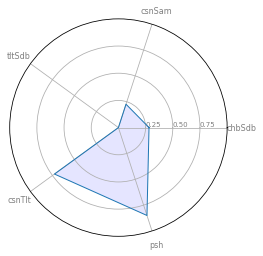

,chbSdb,csnSam,tltSdb,csnTlt,psh
0,0.281439,0.226050,0.000000,0.727064,0.850000
1,0.281439,0.226050,0.000000,0.304472,0.850000
2,0.362475,0.207021,0.100539,0.678326,0.776795
3,0.437794,0.272638,0.036119,0.842317,0.735908
4,0.158709,0.205709,0.625067,0.946388,0.737868
...,...,...,...,...,...
95,0.800605,0.866142,0.216981,0.064507,0.665685
96,0.701412,0.785761,0.714825,0.064507,0.694683
97,0.152656,1.000000,0.509704,0.149943,0.523936
98,0.863147,0.498360,0.710512,0.069381,0.646410


['chbSdb', 'csnSam', 'tltSdb', 'csnTlt', 'psh']
nb cat 5
values [0.28143913920645597, 0.2260498687664042, 0.0, 0.3044724770642202, 0.85, 0.28143913920645597]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [0.28143913920645597, 0.2260498687664042, 0.0, 0.3044724770642202, 0.85, 0.28143913920645597]


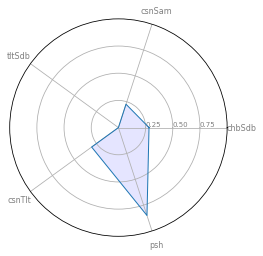

,chbSdb,csnSam,tltSdb,csnTlt,psh
0,0.281439,0.226050,0.000000,0.727064,0.850000
1,0.281439,0.226050,0.000000,0.304472,0.850000
2,0.362475,0.207021,0.100539,0.678326,0.776795
3,0.437794,0.272638,0.036119,0.842317,0.735908
4,0.158709,0.205709,0.625067,0.946388,0.737868
...,...,...,...,...,...
95,0.800605,0.866142,0.216981,0.064507,0.665685
96,0.701412,0.785761,0.714825,0.064507,0.694683
97,0.152656,1.000000,0.509704,0.149943,0.523936
98,0.863147,0.498360,0.710512,0.069381,0.646410


['chbSdb', 'csnSam', 'tltSdb', 'csnTlt', 'psh']
nb cat 5
values [0.3624747814391392, 0.20702099737532803, 0.10053908355795149, 0.6783256880733943, 0.7767949192431124, 0.3624747814391392]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0] [0.3624747814391392, 0.20702099737532803, 0.10053908355795149, 0.6783256880733943, 0.7767949192431124, 0.3624747814391392]


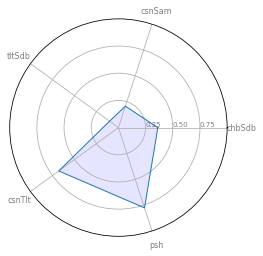

<Figure size 432x288 with 0 Axes>

In [24]:
maxiter = 100
listeObjTotale = []
listeCanvas = []

for i in range(maxiter):
    app = App()
    
    print(i)
    
    A1 = Appartement(app, 400,500)

    #A1.afficherGrille(0)
    #A1.afficherGrille(700)

    A1.afficherAppartement()
    A1.createRooms()
    A1.placeRooms2()
    A1.distanceRooms()
    #A1.afficherObjectifs()
    A1.afficherResultats()
    
    listObjectifs = A1.getObjectifs()
    listObjectifs.insert(0, i)
    listObjectifs.append(f'plan{i}')
    
    cv = A1.getCanvas()
    
    cv.create_text(1500,50,font=('Arial','30','bold'),text = f'plan {i}')
    cv.postscript(file=f"plans_eps/plan{i}.eps", height=app.getH(), width=app.getW(), colormode='color')
    
    listeCanvas.append([cv,'plan{i}'])
            
    listeObjTotale.append(listObjectifs)
    
    #A1.afficherAppartement()
    #wat = A1.afficherMatrice()
    #tabModulo(172)

tabObjectifs = pd.DataFrame(listeObjTotale, columns = ['id', 'Pourcentage surface habitable', 'chbSdb', 'csnSam', 'tltSdb', 'csnTlt', 'plan'])

##display(tabObjectifs)

vectObjectif = [1, 0, 0, 0, 100]
rkg = sim(tabObjectifs, vectObjectif)

tabFinale = pd.concat([tabObjectifs, rkg], axis = 1)
tabFinale = tabFinale.sort_values(by=['Ranking'], ascending=False).reset_index().drop('index', axis = 1)
#display(tabFinale)

tabFinale2 = ranking(tabObjectifs).reset_index().drop('index', axis = 1)
display(tabFinale2)

cv2 = A1.getCanvas2()

if maxiter > 2:
    for i in range(3):
        A1.skillGraph(tabFinale2,i)
        plan_id = tabFinale2['id'][i]
        plan = tabFinale2['plan'][plan_id]
        ps = Image.open(f"plans_eps/{plan}.eps")
        im = open_eps(ps, dpi=119.5)
        if os.path.isfile(f'plans/{plan}.png'):
            print(f'YES - > plans/{plan}.png')
            os.remove(f'plans/{plan}.png')
        im.save(f'plans/{plan}.png', "png", dpi=(119.5, 119.5))
        
        im.show(f'plans/{plan}.png', "png")
        
        '''
        im2 = Image.open(f'plans/{plan}.png')
        w,h = im2.size
        imc = im2.crop((w-1000,h-500,w+1000,h+500))
        im2.show(f'plans/{plan}.png', "png")
        '''




#app.after(1,lambda:app.destroy())
#app.mainloop()


In [9]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 0.4), (0.2, 0.4), (0.2, 1), (1, 1), (1, 0)])
#print(polygon.contains(point))

ModuleNotFoundError: No module named 'shapely'

In [ ]:
plt.plot(*polygon.exterior.xy)

In [ ]:
sizes = [(58, 206), (231, 176), (35, 113), (46, 109)]
positions = rpack.pack(sizes)
positions
poly1 = Polygon(positions)
plt.plot(*poly1.exterior.xy)